In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/covid-x-ray/Covid-19-chest-x-ray-detection-main/Data/test'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [22]:
import os
from random import sample
paths=[]
for dirname, _, filenames in os.walk(r'C:\Users\satya\Downloads\Covid-19-chest-x-ray-detection-main\Covid-19-chest-x-ray-detection-main\Data\train'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        
paths = sample(paths,20)
paths[0].split('\\')[-2]

'Covid'

In [54]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import image
import cv2
from keras.models import Sequential
from keras.layers import Dense ,Conv2D,MaxPool2D,Dropout , Flatten


In [55]:
train_data_gen = image.ImageDataGenerator(rescale = 1/255,shear_range=0.2, zoom_range=0.2,horizontal_flip=True)
train_images = train_data_gen.flow_from_directory(r'C:\Users\satya\Downloads\Covid-19-chest-x-ray-detection-main\Covid-19-chest-x-ray-detection-main\Data\train',target_size=(100,100),batch_size=1,shuffle=True,class_mode='binary')
train_images.class_indices

Found 100 images belonging to 2 classes.


{'Covid': 0, 'Normal': 1}

In [56]:
test_data_gen = image.ImageDataGenerator(rescale = 1/255)
test_images = test_data_gen.flow_from_directory(r'C:\Users\satya\Downloads\Covid-19-chest-x-ray-detection-main\Covid-19-chest-x-ray-detection-main\Data\test',target_size=(100,100),batch_size=1,shuffle=True,class_mode='binary')


Found 100 images belonging to 2 classes.


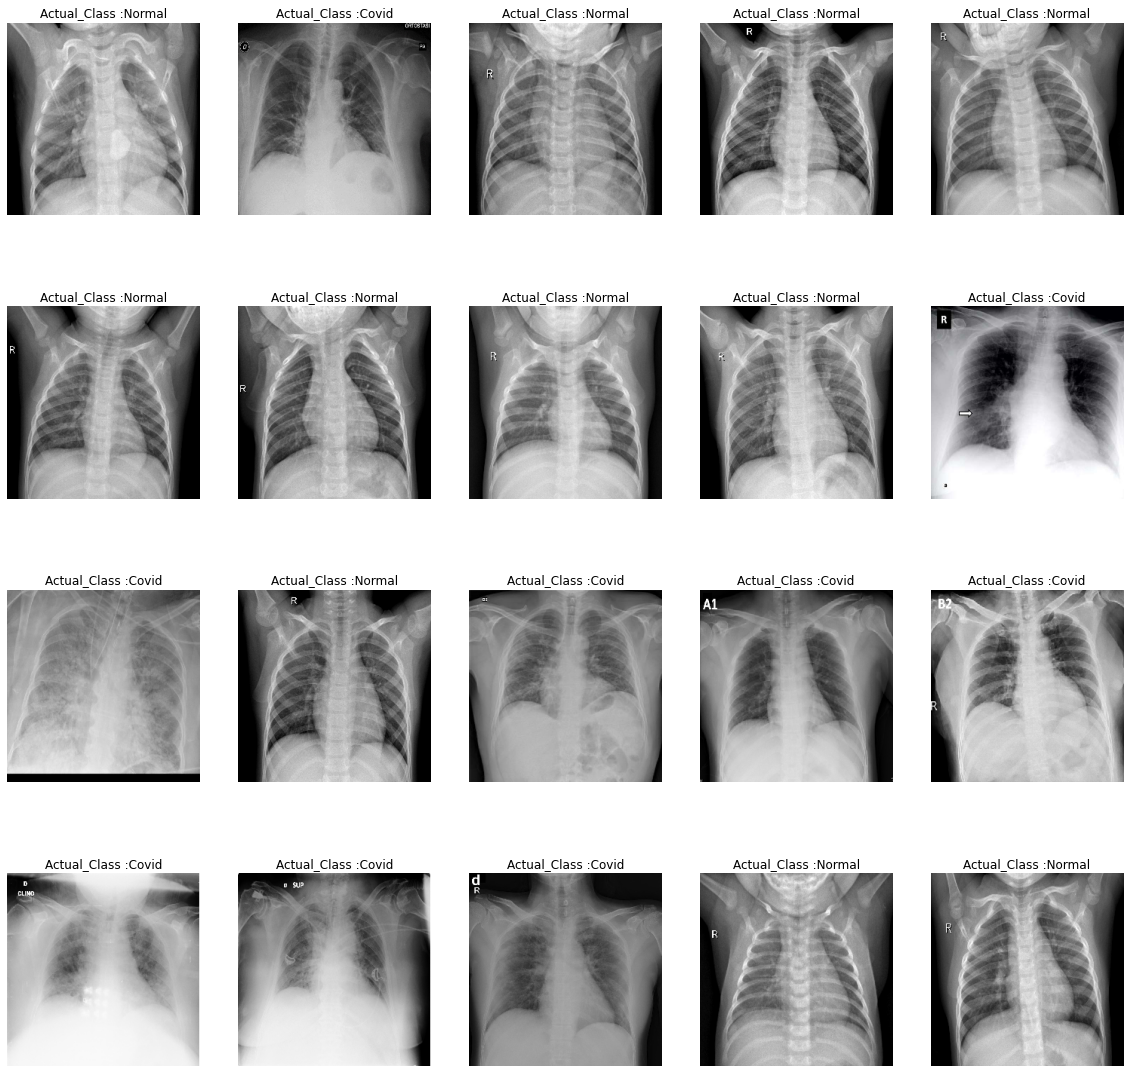

In [57]:
from random import sample
paths=[]
for dirname, _, filenames in os.walk(r'C:\Users\satya\Downloads\Covid-19-chest-x-ray-detection-main\Covid-19-chest-x-ray-detection-main\Data\train'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        
paths = sample(paths,20)
fig=plt.figure(figsize=(20,20))
i=1
for path in paths:
    fig.add_subplot(4,5,i)
    img = keras.utils.load_img(path,target_size=(256,256))
    plt.title("Actual_Class :{}".format(path.split('\\')[-2]))
    plt.imshow(img)
    plt.axis('off')
    i=i+1

In [58]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(100,100,3)))
model.add(MaxPool2D())

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 23, 23, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 128)      

In [60]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])


In [62]:
history = model.fit_generator(train_images,epochs=10,verbose=1,validation_data=test_images)

Epoch 1/10
  1/100 [..............................] - ETA: 4s - loss: 1.2204 - Accuracy: 0.0000e+00

C:\Users\satya\AppData\Local\Temp\ipykernel_28324\1635279100.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_images,epochs=10,verbose=1,validation_data=test_images)


100/100 [==============================] - 6s 61ms/step - loss: 0.3487 - Accuracy: 0.8700 - val_loss: 0.1641 - val_Accuracy: 0.9600
Epoch 2/10
100/100 [==============================] - 6s 61ms/step - loss: 0.1726 - Accuracy: 0.9300 - val_loss: 0.3915 - val_Accuracy: 0.9200
Epoch 3/10
100/100 [==============================] - 6s 58ms/step - loss: 0.2235 - Accuracy: 0.9200 - val_loss: 0.2082 - val_Accuracy: 0.9600
Epoch 4/10
100/100 [==============================] - 6s 59ms/step - loss: 0.1276 - Accuracy: 0.9500 - val_loss: 0.1798 - val_Accuracy: 0.9500
Epoch 5/10
100/100 [==============================] - 6s 60ms/step - loss: 0.0523 - Accuracy: 0.9900 - val_loss: 0.1879 - val_Accuracy: 0.9600
Epoch 6/10
100/100 [==============================] - 6s 59ms/step - loss: 0.1612 - Accuracy: 0.9600 - val_loss: 0.3514 - val_Accuracy: 0.9100
Epoch 7/10
100/100 [==============================] - 6s 60ms/step - loss: 0.1475 - Accuracy: 0.9400 - val_loss: 0.2652 - val_Accuracy: 0.9400
Epoch 8/10

In [63]:
history.history

{'loss': [0.3487190306186676,
  0.17261432111263275,
  0.22348368167877197,
  0.12759040296077728,
  0.052325498312711716,
  0.16120408475399017,
  0.14752298593521118,
  0.04535966366529465,
  0.21533113718032837,
  0.2158346027135849],
 'Accuracy': [0.8700000047683716,
  0.9300000071525574,
  0.9200000166893005,
  0.949999988079071,
  0.9900000095367432,
  0.9599999785423279,
  0.9399999976158142,
  0.9800000190734863,
  0.8999999761581421,
  0.9300000071525574],
 'val_loss': [0.16413994133472443,
  0.3914673328399658,
  0.20815527439117432,
  0.1797587275505066,
  0.18791480362415314,
  0.35137030482292175,
  0.26520076394081116,
  0.3157559931278229,
  0.10293896496295929,
  0.08275580406188965],
 'val_Accuracy': [0.9599999785423279,
  0.9200000166893005,
  0.9599999785423279,
  0.949999988079071,
  0.9599999785423279,
  0.9100000262260437,
  0.9399999976158142,
  0.9300000071525574,
  0.949999988079071,
  0.9700000286102295]}

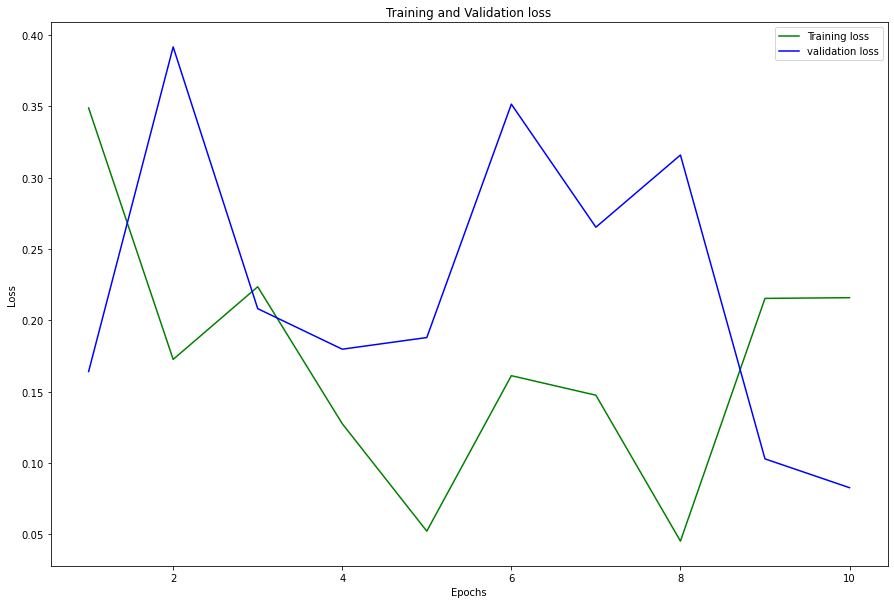

In [68]:
plt.figure(figsize=(15,10))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

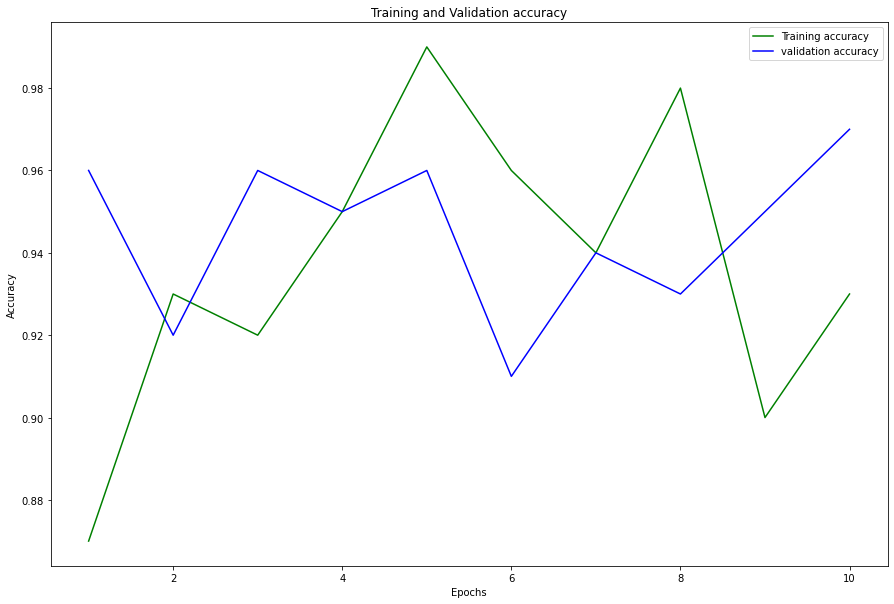

In [69]:
plt.figure(figsize=(15,10))
loss_train = history.history['Accuracy']
loss_val = history.history['val_Accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [72]:
path=r'C:\Users\satya\Downloads\Covid-19-chest-x-ray-detection-main\Covid-19-chest-x-ray-detection-main\Data\test\Normal\IM-0238-0001.jpeg'
img = keras.utils.load_img(path,target_size=(100,100))
img_scaled = keras.utils.img_to_array(img)/255
img_array = np.array([img_scaled])
#model.predict(img_array)[0][0]
#path.split('/')[-2]
img_array.shape

(1, 100, 100, 3)

In [73]:
def prediction(img):
    img = keras.utils.img_to_array(img)/255
    img = np.array([img])
    if model.predict(img)<0.5:
        confidence = 100*(1-model.predict(img)[0][0])
        pred = 'Covid'
        return pred,confidence
    if model.predict(img)>0.5:
        confidence = 100*(model.predict(img)[0][0])
        pred = 'Normal'
        return pred,confidence
    if model.predict(img)==0.5:
        confidence = 0
        pred = 'not sure'
        return pred,confidence

In [74]:
from random import sample
paths=[]
for dirname, _, filenames in os.walk(r'C:\Users\satya\Downloads\Covid-19-chest-x-ray-detection-main\Covid-19-chest-x-ray-detection-main\Data\test'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        
paths = sample(paths,20)
paths

['C:\\Users\\satya\\Downloads\\Covid-19-chest-x-ray-detection-main\\Covid-19-chest-x-ray-detection-main\\Data\\test\\Normal\\IM-0293-0001.jpeg',
 'C:\\Users\\satya\\Downloads\\Covid-19-chest-x-ray-detection-main\\Covid-19-chest-x-ray-detection-main\\Data\\test\\Normal\\IM-0285-0001.jpeg',
 'C:\\Users\\satya\\Downloads\\Covid-19-chest-x-ray-detection-main\\Covid-19-chest-x-ray-detection-main\\Data\\test\\Normal\\IM-0236-0001.jpeg',
 'C:\\Users\\satya\\Downloads\\Covid-19-chest-x-ray-detection-main\\Covid-19-chest-x-ray-detection-main\\Data\\test\\Covid\\covid-19-pneumonia-53.jpg',
 'C:\\Users\\satya\\Downloads\\Covid-19-chest-x-ray-detection-main\\Covid-19-chest-x-ray-detection-main\\Data\\test\\Covid\\covid-19-pneumonia-mild.JPG',
 'C:\\Users\\satya\\Downloads\\Covid-19-chest-x-ray-detection-main\\Covid-19-chest-x-ray-detection-main\\Data\\test\\Normal\\IM-0255-0001.jpeg',
 'C:\\Users\\satya\\Downloads\\Covid-19-chest-x-ray-detection-main\\Covid-19-chest-x-ray-detection-main\\Data\\tes

1/1 [==============================] - 0s 20ms/step


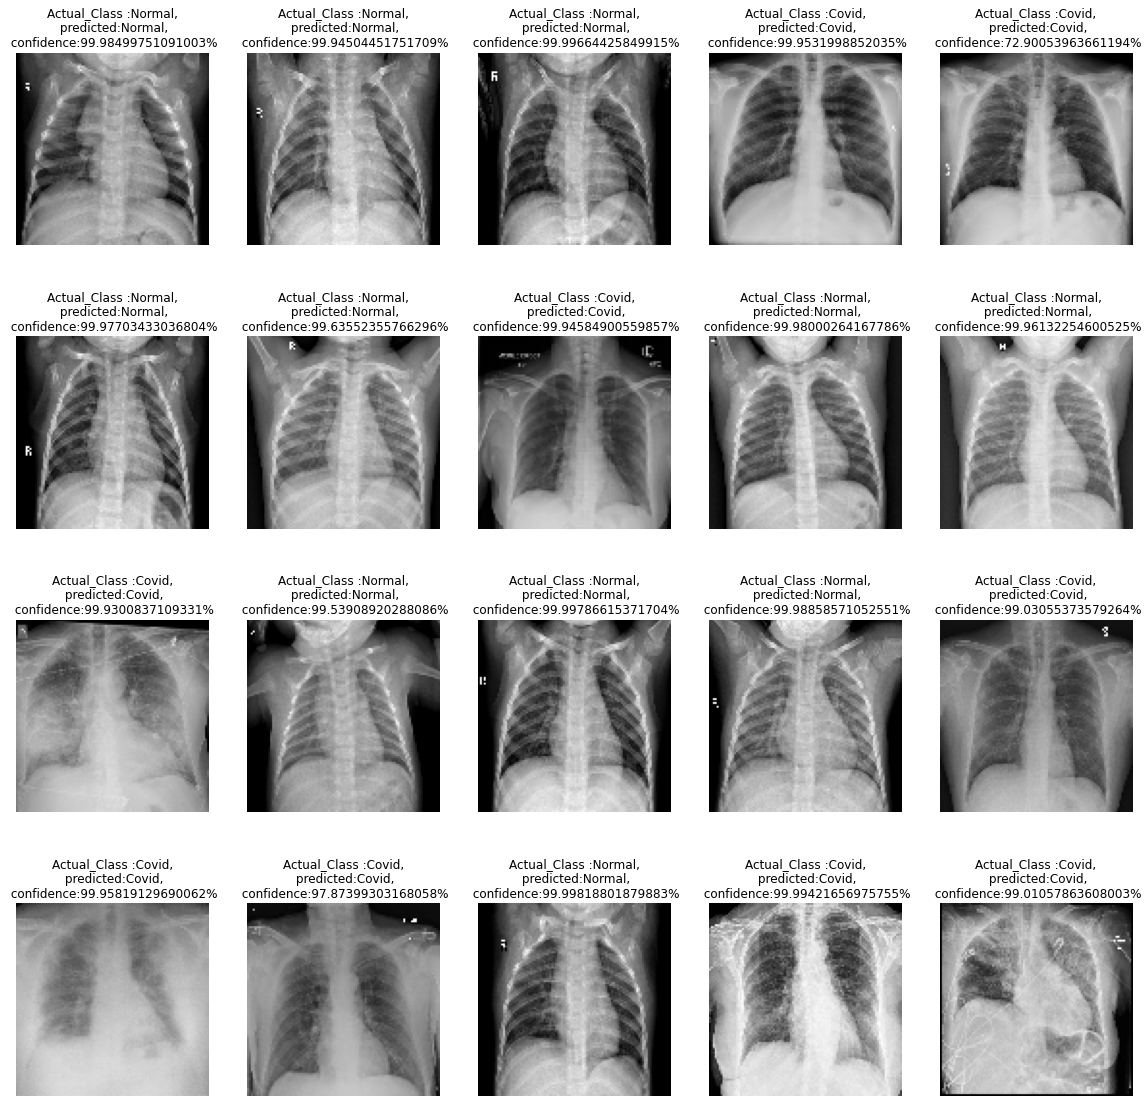

In [76]:
fig=plt.figure(figsize=(20,20))
i=1
for path in paths:
    fig.add_subplot(4,5,i)
    img = keras.utils.load_img(path,target_size=(100,100))
    predicted_class,confidence = prediction(img)
    plt.title("Actual_Class :{},\n predicted:{},\n confidence:{}".format(path.split('\\')[-2],predicted_class,str(confidence)+'%'))
    plt.imshow(img)
    plt.axis('off')
    i=i+1

In [77]:
model.save('covid_model',overwrite=True)

INFO:tensorflow:Assets written to: covid_model\assets


INFO:tensorflow:Assets written to: covid_model\assets
